In [43]:
import pandas as pd
import numpy as np
import emd
import pylab as plt
import statsmodels.api as sm
import plotly.express as px
import os

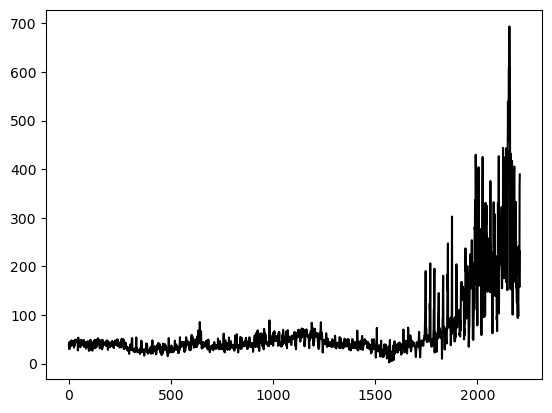

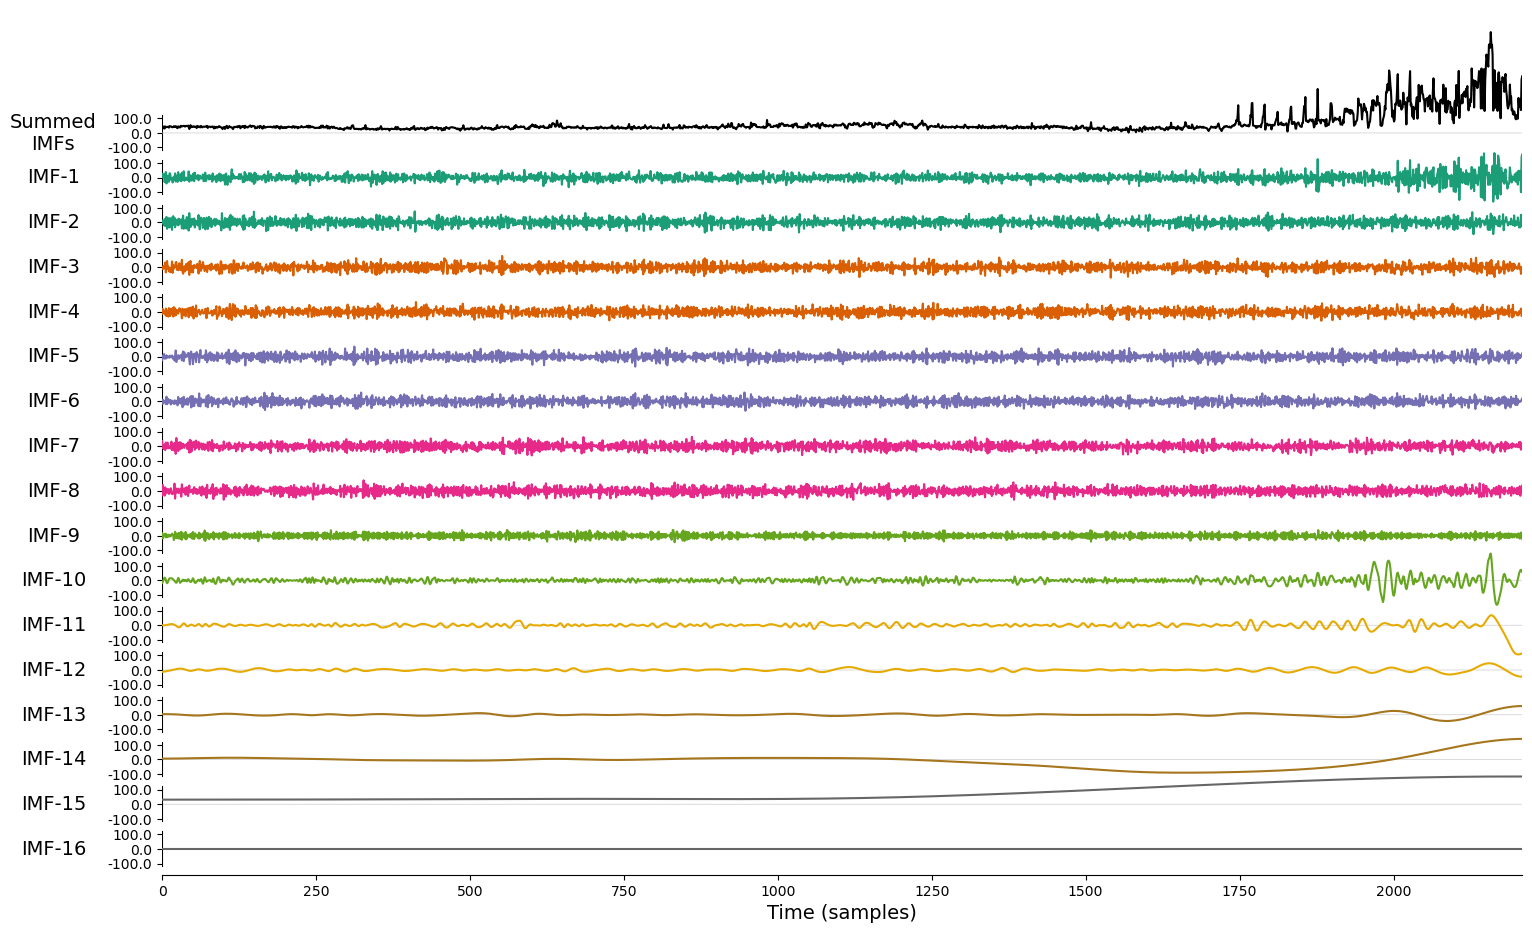

In [24]:
data = pd.read_csv("./Data/Netherlands/combined.csv")
data = data[["LNG Price (€/MWh)", "Price"]]
data = data.dropna(axis=0)
price_data = data["Price"].to_numpy()
lng_price = data["LNG Price (€/MWh)"].to_numpy()
# Todo: Match up the values where there is a nan and delete the whole row

plt.figure()
plt.plot(price_data, "k")

imf, noise = emd.sift.complete_ensemble_sift(price_data, ensemble_noise=1)

emd.plotting.plot_imfs(imf)

IP, IF, IA = emd.spectra.frequency_transform(imf, 256, "hilbert")


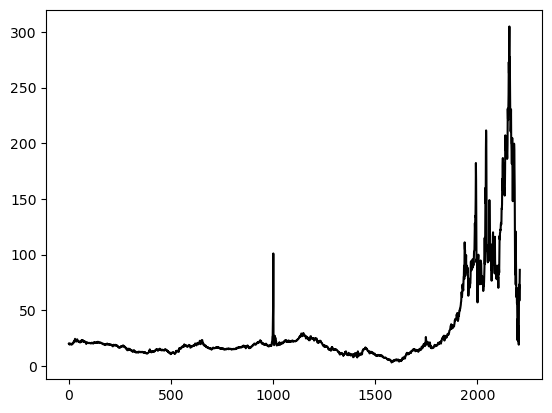

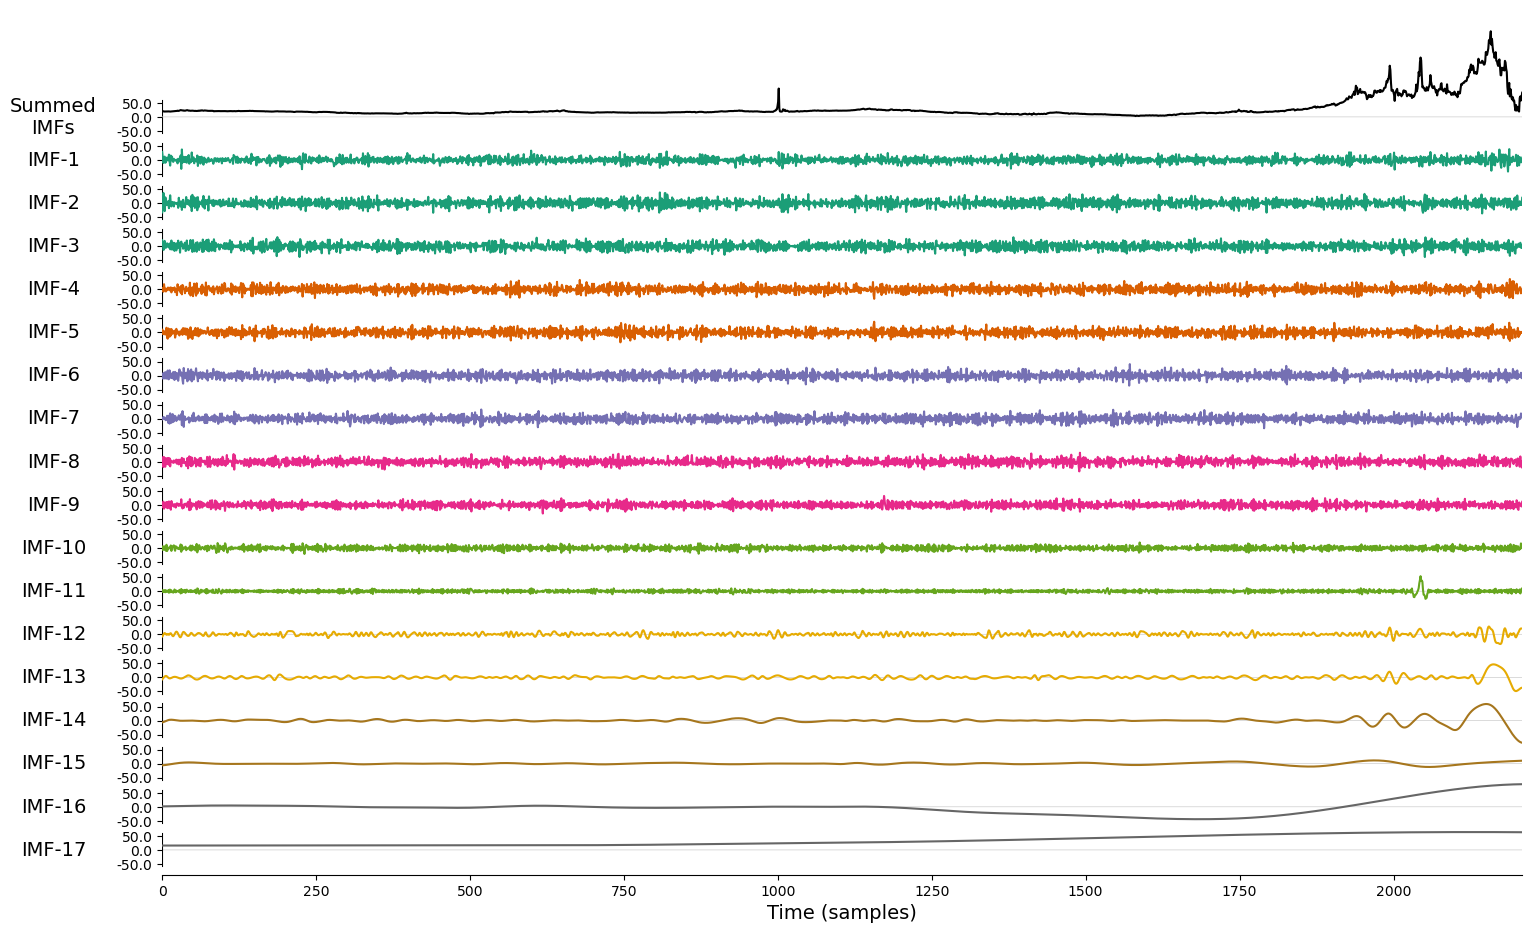

In [25]:



plt.figure()
plt.plot(lng_price, "k")

lng_imf, lng_noise = emd.sift.complete_ensemble_sift(lng_price, ensemble_noise=1)

emd.plotting.plot_imfs(lng_imf)

IP, IF, IA = emd.spectra.frequency_transform(imf, 256, "hilbert")

In [26]:
# start to run the regressions on the data

low_pass_elec = imf[:, 4:]
low_pass_means_elec = np.apply_along_axis(np.mean, 1, low_pass_elec)

low_pass_lng = lng_imf[:, 4:]
low_pass_means_lng = np.apply_along_axis(np.mean, 1, low_pass_lng)

px.scatter(x=low_pass_means_elec, y=low_pass_means_lng)

In [27]:
model = sm.OLS(low_pass_means_elec, low_pass_means_lng)
model.fit().params

array([2.06848549])

In [33]:
# start to run the regressions on the data

med_pass_elec = imf[:, 10:]
med_pass_means_elec = np.apply_along_axis(np.mean, 1, med_pass_elec)

med_pass_lng = lng_imf[:, 10:]
med_pass_means_lng = np.apply_along_axis(np.mean, 1, med_pass_lng)

px.scatter(x=med_pass_means_elec, y=med_pass_means_lng)

In [35]:
model = sm.OLS(med_pass_means_elec, med_pass_means_lng)
model.fit().params

array([2.22840061])

In [56]:
def filter_and_regress(combined_data, country, 
        low_pass_threshold=3, med_pass_threshold=10, high_pass_threshold=14):
        
        combined_data = combined_data[["LNG Price (€/MWh)", "Price"]]
        combined_data = combined_data.dropna(axis=0)
        elec_price = combined_data["Price"].to_numpy()
        lng_price = combined_data["LNG Price (€/MWh)"].to_numpy()
        # plot and transform all of the data for electricity pricing
        #plt.figure()
        #plt.plot(elec_price, "k")

        imf, noise = emd.sift.complete_ensemble_sift(elec_price, ensemble_noise=1)

        #emd.plotting.plot_imfs(imf)

        IP, IF, IA = emd.spectra.frequency_transform(imf, 256, "hilbert")
        # plot and transform all of the data for LNG prices
        #plt.figure()
        #plt.plot(lng_price, "k")

        lng_imf, lng_noise = emd.sift.complete_ensemble_sift(lng_price, ensemble_noise=1)

        #emd.plotting.plot_imfs(lng_imf)

        IP, IF, IA = emd.spectra.frequency_transform(imf, 256, "hilbert")

        low_pass_elec = imf[:, low_pass_threshold:]
        low_pass_means_elec = np.apply_along_axis(np.mean, 1, low_pass_elec)

        low_pass_lng = lng_imf[:, low_pass_threshold:]
        low_pass_means_lng = np.apply_along_axis(np.mean, 1, low_pass_lng)

        #px.scatter(x=low_pass_means_elec, y=low_pass_means_lng)


        med_pass_elec = imf[:, med_pass_threshold:]
        med_pass_means_elec = np.apply_along_axis(np.mean, 1, med_pass_elec)

        med_pass_lng = lng_imf[:, med_pass_threshold:]
        med_pass_means_lng = np.apply_along_axis(np.mean, 1, med_pass_lng)

        #px.scatter(x=med_pass_means_elec, y=med_pass_means_lng)
        
        high_pass_elec = imf[:, high_pass_threshold:]
        high_pass_means_elec = np.apply_along_axis(np.mean, 1, high_pass_elec)

        high_pass_lng = lng_imf[:, high_pass_threshold:]
        high_pass_means_lng = np.apply_along_axis(np.mean, 1, high_pass_lng)

        #px.scatter(x=high_pass_means_elec, y=high_pass_means_lng)

        low_model = sm.OLS(low_pass_means_elec, low_pass_means_lng)
        print("Low pass coefficient = {}".format(low_model.fit().params[0]))

        med_model = sm.OLS(med_pass_means_elec, med_pass_means_lng)
        print("Med Pass coefficient = {}".format(med_model.fit().params[0]))

        high_model = sm.OLS(high_pass_means_elec, high_pass_means_lng)
        print("High Pass coefficient = {}".format(high_model.fit().params[0]))

In [57]:
data = pd.read_csv("./Data/Germany/combined.csv")
filter_and_regress(data, "Germany")
X_low = pd.DataFrame({"LNG": low_pass_means_lng, "Demand": low_pass_means_demand})
        X_low_log = X_low.copy()
        X_low_log["LNG"] = X_low_log["LNG"].apply(lambda x: np.log(x+np.min(X_low_log["LNG"])+1))
        low_model = linear_model.LinearRegression().fit(X_low_log, np.log(low_pass_means_elec+np.min(low_pass_means_elec)+1))
        print("Low pass LNG coefficient = {}, Demand Coefficient = {}".format(low_model.coef_[0], low_model.coef_[1]))

        X_med = pd.DataFrame({"LNG": med_pass_means_lng, "Demand": med_pass_means_demand})
        X_med_log = X_med.copy()
        X_med_log["LNG"] = X_med_log["LNG"].apply(lambda x: np.log(x+np.min(X_med_log["LNG"])+1))
        med_model = linear_model.LinearRegression().fit(X_med_log, np.log(med_pass_means_elec + np.min(med_pass_means_elec)+1))
        print("Med Pass coefficient = {}, Demand Coefficient".format(med_model.coef_[0], med_model.coef_[1]))

        X_high = pd.DataFrame({"LNG": high_pass_means_lng, "Demand": high_pass_means_demand})
        X_high_log = X_high.copy()
        X_high_log["LNG"] = X_high_log["LNG"].apply(lambda x: np.log(x + np.min(X_high_log["LNG"])+1))
        high_model = linear_model.LinearRegression().fit(X_high_log, np.log(high_pass_means_elec + np.min(high_pass_means_elec) + 1))
        print("High Pass coefficient = {},  Demand Coefficent = {}".format(high_model.coef_[0], high_model.coef_[1]))

Low pass coefficient = 1.7901884618022639
Med Pass coefficient = 1.8622808773524022
High Pass coefficient = 2.0324633560109233


In [65]:
# run regressions based on the timescales of COVID and war in Ukraine
def timeperiod_differences(combined_data_path, country_name):
        # these serve as best guesses, change at will
        COVID_START = "2020-03-01"
        WAR_START = "2/1/2022"

        # read in the data from the combined dataset
        data = pd.read_csv(combined_data_path)
        data["Date"] = pd.to_datetime(data["Date"])
        pre_covid = data[data["Date"] < COVID_START]

        covid = data[data["Date"] > COVID_START]
        covid = covid[covid["Date"] < WAR_START]

        war = data[data["Date"] > WAR_START]

        # run the regressions on the given datasets
        print("Pre-COVID in {}".format(country_name))
        filter_and_regress(pre_covid, country_name)

        print("COVID Era in {}".format(country_name))
        filter_and_regress(covid, country_name, med_pass_threshold=8, high_pass_threshold=11)

        print("War in Ukraine Era in {}".format(country_name))
        filter_and_regress(war, country_name, med_pass_threshold=6, high_pass_threshold=9)





In [66]:
timeperiod_differences("./Data/Netherlands/combined.csv", "Netherlands")

Pre-COVID in Netherlands
Low pass coefficient = 2.456298960031889
Med Pass coefficient = 2.65630531977352
High Pass coefficient = 3.3402042574735695
COVID Era in Netherlands
Low pass coefficient = 2.0557251515382102
Med Pass coefficient = 2.122498297552011
High Pass coefficient = 2.15250042642466
War in Ukraine Era in Netherlands
Low pass coefficient = 2.118950037816874
Med Pass coefficient = 2.2551819280430347
High Pass coefficient = 2.833661994925394
